In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# I used the next two lines to install plotly
# import sys
# !{sys.executable} -m pip install plotly

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
olympics = pd.read_csv('athlete_events.csv')

In [5]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Clean the Team column
# Some of the entries in the column contain the country name followed by a dash and a number, such as China-2.
new_Team = [team[:-2] if team[-2] == '-' else team for team in olympics.Team]
olympics.Team = new_Team

tt_men = olympics.loc[(olympics.Sport == "Table Tennis") & (olympics.Sex == 'M')]
tt_women = olympics.loc[(olympics.Sport == "Table Tennis") & (olympics.Sex == 'F')]
tt_men_singles = olympics.loc[(olympics.Event == "Table Tennis Men's Singles")]

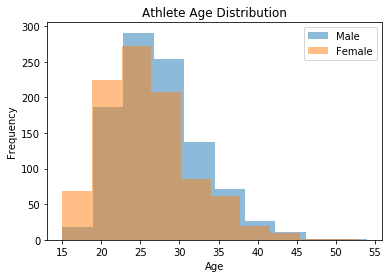

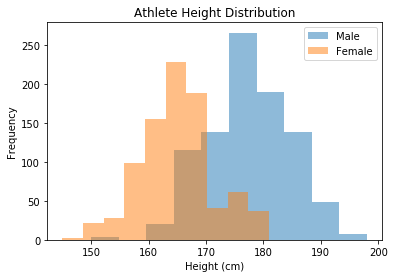

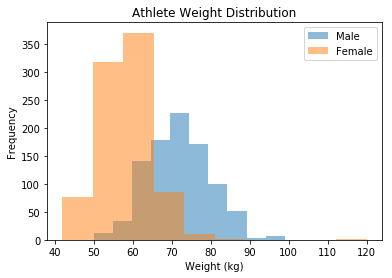

In [5]:
# Histograms for the age, height, and weight of table tennis players, grouped by gender
tt_men.Age.plot(kind='hist', title = 'Athlete Age Distribution', alpha=0.5, label = 'Male')
tt_women.Age.plot(kind='hist', alpha=0.5, label = 'Female')
plt.xlabel('Age')
plt.legend(loc ='upper right')
plt.show()

tt_men.Height.plot(kind='hist', title = 'Athlete Height Distribution', alpha=0.5, label = 'Male')
tt_women.Height.plot(kind='hist', alpha=0.5, label = 'Female')
plt.xlabel('Height (cm)')
plt.legend(loc ='upper right')
plt.show()

tt_men.Weight.plot(kind='hist', title = 'Athlete Weight Distribution', alpha=0.5, label = 'Male')
tt_women.Weight.plot(kind='hist', alpha=0.5, label = 'Female')
plt.xlabel('Weight (kg)')
plt.legend(loc ='upper right')
plt.show()


In [6]:
# Examine the huge outlier in the weight histogram
tt_women.loc[tt_women.Weight == tt_women.Weight.max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
175296,88096,Patricia Akosua Offel,F,16.0,NaN,120.0,Ghana,GHA,1988 Summer,1988,Summer,Seoul,Table Tennis,Table Tennis Women's Singles,NaN


In [8]:
# Looking for a particular player I knew
tt_women.loc[tt_women.Name == 'Ariel Yenhua Hsing']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
99878,50528,Ariel Yenhua Hsing,F,16.0,165.0,53.0,United States,USA,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Singles,NaN
99879,50528,Ariel Yenhua Hsing,F,16.0,165.0,53.0,United States,USA,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Team,NaN


In [9]:
# Ariel defeated the oldest female athlete, Ni Xia Lian, in the round of 64
tt_women.loc[tt_women.Age == tt_women.Age.max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
170648,85768,Xia Lian Ni,F,53.0,157.0,58.0,Luxembourg,LUX,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Women's Singles,NaN


In [10]:
# Is the oldest athlete male or female?
tt_men.loc[tt_men.Age == tt_men.Age.max()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
92660,46946,Zhiwen He Cheng,M,54.0,173.0,73.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN


In [11]:
men_singles_bronze = tt_men_singles.loc[tt_men_singles.Medal == 'Bronze'].groupby('Year')['Year'].count()
men_singles_bronze

# Upon further research, there was no third place game played in 1992, leading to two bronze medals.

Year
1988    1
1992    2
1996    1
2000    1
2004    1
2008    1
2012    1
2016    1
Name: Year, dtype: int64

In [12]:
total_medals_country_men = tt_men.loc[pd.notnull(tt_men.Medal)].groupby('Team').Team.count()
total_medals_country_men

Team
China          37
Denmark         2
France          3
Germany        13
Hong Kong       2
Japan           4
South Korea    18
Sweden          3
Yugoslavia      2
Name: Team, dtype: int64

In [13]:
total_medals_country_women = tt_women.loc[pd.notnull(tt_women.Medal)].groupby('Team').Team.count()
total_medals_country_women

Team
China             44
Chinese Taipei     2
Germany            3
Japan              6
North Korea        5
Singapore          7
South Korea       15
Yugoslavia         2
Name: Team, dtype: int64

In [14]:
df = pd.DataFrame(data = {'Medals':total_medals_country_men}, index=total_medals_country_men.index).reset_index()
print(df)


          Team  Medals
0        China      37
1      Denmark       2
2       France       3
3      Germany      13
4    Hong Kong       2
5        Japan       4
6  South Korea      18
7       Sweden       3
8   Yugoslavia       2


In [15]:
trace = go.Choropleth(
            locations = df['Team'],
            locationmode='country names',
            z = df['Medals'],
            text = df['Team'],
            autocolorscale = False,
            reversescale = True,
            colorscale = 'Viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 1)
            ),
            colorbar = dict(
                title = 'Medals',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Table Tennis Medals by Country (Men)',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig) 

In [16]:
df2 = pd.DataFrame(data = {'Medals':total_medals_country_women}, index=total_medals_country_women.index).reset_index()
print(df2)

             Team  Medals
0           China      44
1  Chinese Taipei       2
2         Germany       3
3           Japan       6
4     North Korea       5
5       Singapore       7
6     South Korea      15
7      Yugoslavia       2


In [17]:
trace2 = go.Choropleth(
            locations = df2['Team'],
            locationmode='country names',
            z = df2['Medals'],
            text = df2['Team'],
            autocolorscale = False,
            reversescale = True,
            colorscale = 'Viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 1)
            ),
            colorbar = dict(
                title = 'Medals',
                tickprefix = '')
        )

data2 = [trace2]
layout = go.Layout(
    title = 'Table Tennis Medals by Country (Women)',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig2 = dict( data=data2, layout=layout )
iplot(fig2) 